In [14]:
!wget https://raw.githubusercontent.com/nareshthakare/CL563/main/environmental_hazards_dataset.csv

--2024-04-24 13:54:16--  https://raw.githubusercontent.com/nareshthakare/CL563/main/environmental_hazards_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374996 (366K) [text/plain]
Saving to: ‘environmental_hazards_dataset.csv’

environmental_hazar 100%[===================>] 366.21K  --.-KB/s    in 0.1s    

2024-04-24 13:54:16 (2.85 MB/s) - ‘environmental_hazards_dataset.csv’ saved [374996/374996]



In [21]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Naresh_df = pd.read_csv('/content/environmental_hazards_dataset.csv')

Naresh_df.drop(columns=['Date'], inplace=True)
Naresh_df.drop(columns=['Time'], inplace=True)

In [22]:
Naresh_df.head()

,PM2.5 (µg/m³),PM10 (µg/m³),SO2 (ppm),NO2 (ppm),O3 (ppm),CO (ppm),VOCs (ppm),Temperature (°C),Humidity (%),Wind Speed (m/s),...,Wind Direction (Plant),Elevation,Proximity to Water Bodies,Historical Pollution Levels,Historical Temperature,Historical Humidity,Historical Wind Speed,Regulatory Data,Industrial Activity,Demographic Data
0,72.270101,32.568989,0.043392,0.028461,0.055327,0.179492,0.032548,22.166122,58.331806,3.948585,...,233.987396,145.853101,12.820206,56.164568,14.135469,50.141578,3.863696,2.194684,46.939795,185.703235
1,6.747984,9.135173,0.011195,0.044592,0.079686,4.749705,0.060121,15.034988,39.636747,0.126325,...,354.246242,140.754262,92.746775,30.329635,30.398358,54.108518,4.839530,6.000220,89.332581,575.923842
2,68.086136,36.266488,0.099623,0.004048,0.062645,9.671082,0.004625,12.235807,47.994405,3.116433,...,352.970636,274.777236,27.332588,89.385499,19.188208,30.352519,2.302978,0.114647,85.588037,63.636990
3,70.109788,4.536920,0.029038,0.052235,0.057379,4.952743,0.059823,11.762767,44.671071,0.879330,...,181.294971,431.887854,67.987377,15.830185,22.677743,39.068708,0.338013,4.162035,82.653984,984.506065
4,55.872374,28.280174,0.007791,0.009316,0.078406,9.019366,0.080178,29.263493,66.528496,0.804029,...,170.978667,490.824872,66.329124,4.596059,32.173583,65.801097,1.771949,3.594852,20.471000,732.171033


In [23]:

print(Naresh_df.head())

# Separate features (X) and target variable (y)
X = Naresh_df.drop('Historical Pollution Levels', axis=1)  # Assuming 'environmental_alarm' is the target variable
y = Naresh_df['Historical Pollution Levels']




   PM2.5 (µg/m³)  PM10 (µg/m³)  SO2 (ppm)  NO2 (ppm)  O3 (ppm)  CO (ppm)  \
0      72.270101     32.568989   0.043392   0.028461  0.055327  0.179492   
1       6.747984      9.135173   0.011195   0.044592  0.079686  4.749705   
2      68.086136     36.266488   0.099623   0.004048  0.062645  9.671082   
3      70.109788      4.536920   0.029038   0.052235  0.057379  4.952743   
4      55.872374     28.280174   0.007791   0.009316  0.078406  9.019366   

   VOCs (ppm)  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  ...  \
0    0.032548         22.166122     58.331806          3.948585  ...   
1    0.060121         15.034988     39.636747          0.126325  ...   
2    0.004625         12.235807     47.994405          3.116433  ...   
3    0.059823         11.762767     44.671071          0.879330  ...   
4    0.080178         29.263493     66.528496          0.804029  ...   

   Wind Direction (Plant)   Elevation  Proximity to Water Bodies  \
0              233.987396  145.853101     

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


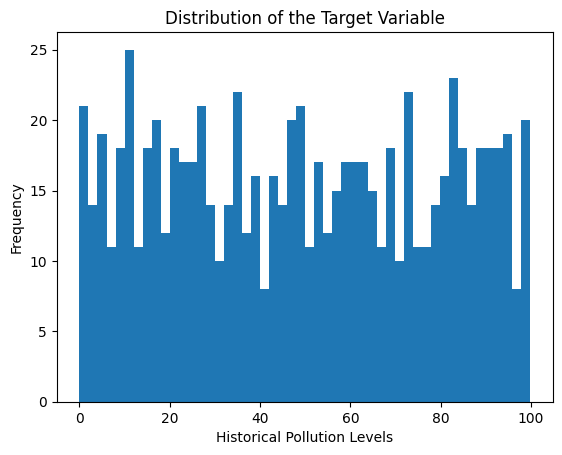

In [25]:
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.hist(y_train, bins=50)
plt.xlabel('Historical Pollution Levels')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable')
plt.show()

In [26]:
# Initialize the Random Forest regressor
regressor = RandomForestRegressor()

# Model Training
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

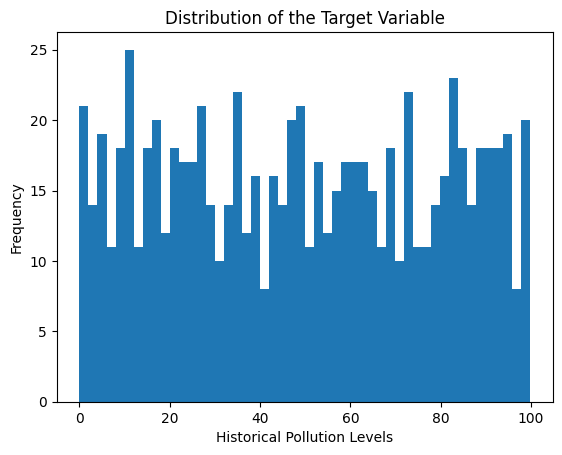

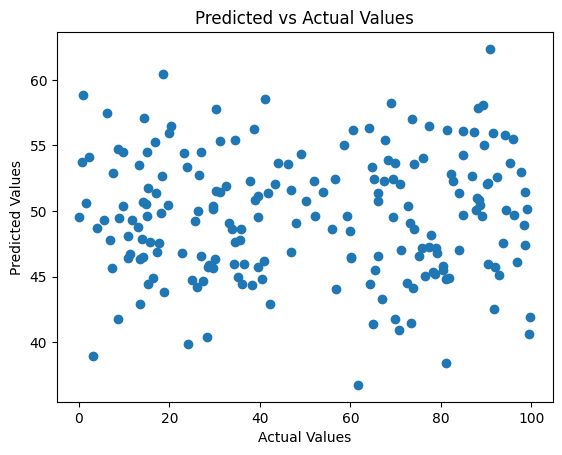

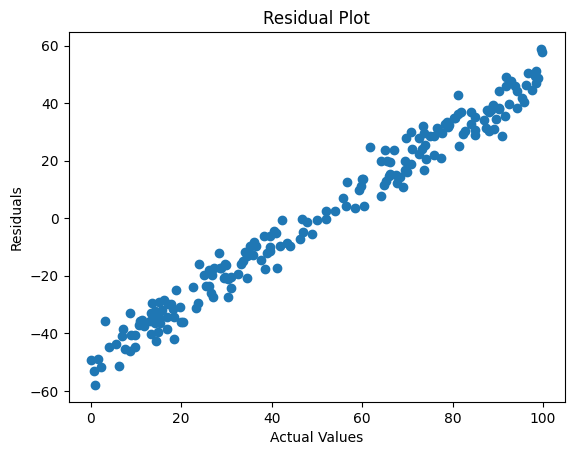

In [27]:

import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.hist(y_train, bins=50)
plt.xlabel('Historical Pollution Levels')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable')
plt.show()

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

PM2.5 (µg/m³): 0.035019728648108976
PM10 (µg/m³): 0.039653204530442215
SO2 (ppm): 0.026427839805541448
NO2 (ppm): 0.030486415783481387
O3 (ppm): 0.0280823579129426
CO (ppm): 0.03712929351413434
VOCs (ppm): 0.030216352632369232
Temperature (°C): 0.03202309359312368
Humidity (%): 0.03383618629875475
Wind Speed (m/s): 0.02602892325415139
Wind Direction (°): 0.027743022689135886
pH: 0.031249453233216647
DO (mg/L): 0.03354840040092924
BOD (mg/L): 0.03367853109538585
COD (mg/L): 0.0385887071781456
Turbidity (NTU): 0.03496462659281857
Lead (µg/L): 0.030252603733497904
Mercury (µg/L): 0.039885082611794916
Arsenic (µg/L): 0.03443354687309924
Fecal Coliforms (MPN/100mL): 0.032985336550280846
Total Coliforms (MPN/100mL): 0.031188715153401273
Distance from Plant: 0.029271002621990512
Wind Direction (Plant): 0.03025064137002233
Elevation: 0.026187822120269308
Proximity to Water Bodies: 0.032234248301318866
Historical Temperature: 0.031779985653323684
Historical Humidity: 0.03151737347236522
Histori

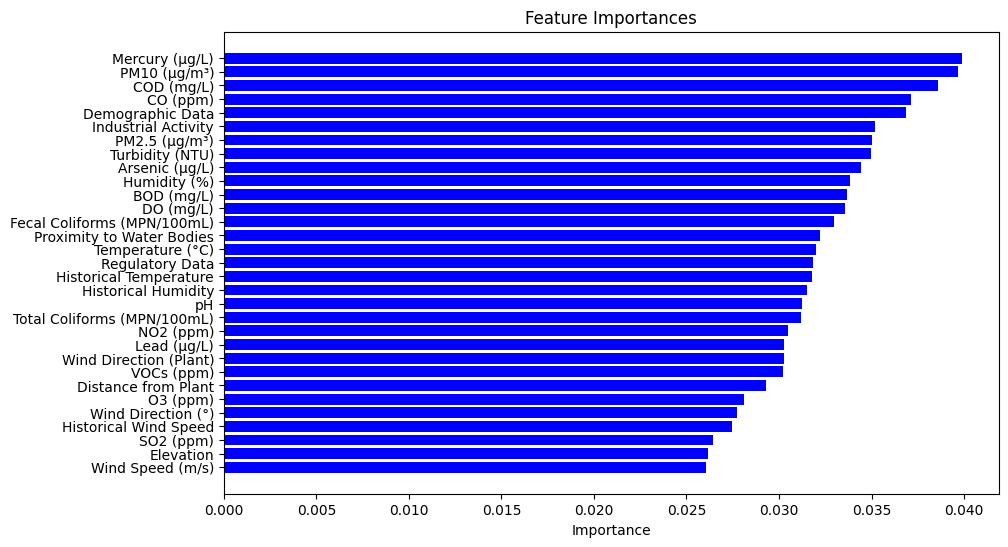

In [28]:

# Feature Importance
importances = regressor.feature_importances_
features = X.columns
for i, feature in enumerate(features):
  print(f'{feature}: {importances[i]}')



# Plot the feature importances
importances = regressor.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Importance')
plt.show()


In [29]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Model Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Mean Squared Error: 921.9789274478067
R^2 Score: -0.02175649199487495
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


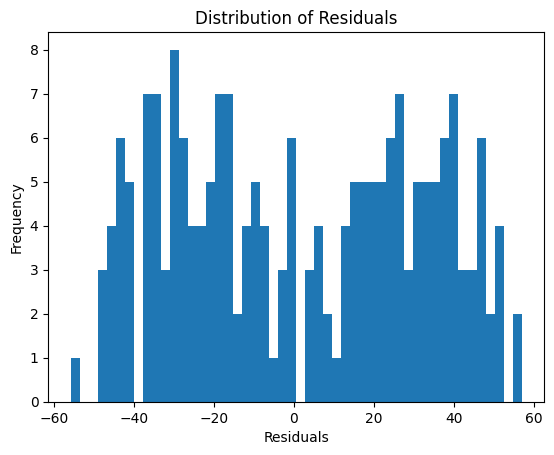

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Plot the distribution of the residuals
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:

# Re-train with the best parameters
best_regressor = RandomForestRegressor(**grid_search.best_params_)
best_regressor.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_regressor.predict(X_test)

# Model Evaluation with the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error with Best Model:", mse_best)
print("R^2 Score with Best Model:", r2_best)


Mean Squared Error with Best Model: 923.7585952934003
R^2 Score with Best Model: -0.023728757434675618


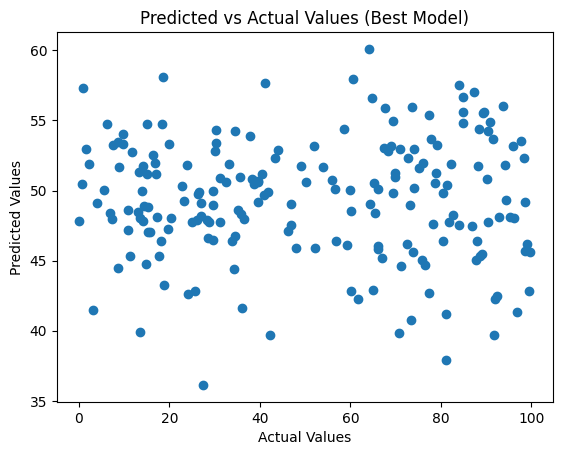

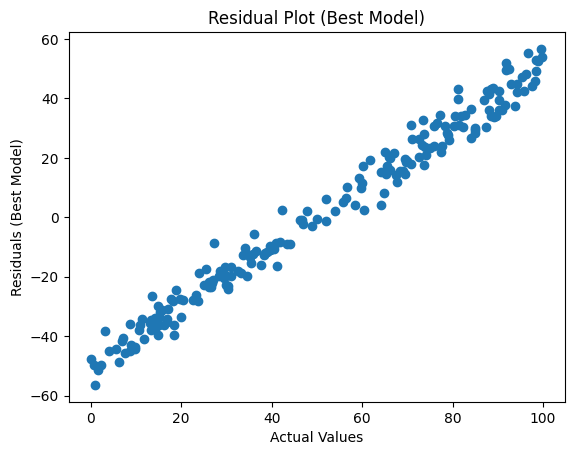

In [ ]:
import matplotlib.pyplot as plt
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Best Model)')
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Best Model)')
plt.title('Residual Plot (Best Model)')
plt.show()